## Importing Packages


In [86]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Read Dataset

In [87]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [88]:
!gdown 1uzaLqfm-96ERmDI75Ho2QBSjUPzm8qJ8

Downloading...
From: https://drive.google.com/uc?id=1uzaLqfm-96ERmDI75Ho2QBSjUPzm8qJ8
To: /content/crop_recommendation.csv
100% 271k/271k [00:00<00:00, 130MB/s]


In [89]:
crop = pd.read_csv("/content/crop_recommendation.csv")
crop = crop.loc[:, ~crop.columns.str.contains('^Unnamed')]
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Analysis


In [90]:
crop.label.value_counts()

banana         280
watermelon     280
mango          260
rice           240
pigeonpeas     240
mothbeans      240
blackgram      240
lentil         240
pomegranate    240
muskmelon      240
papaya         240
coconut        240
maize          220
mungbean       220
cotton         220
jute           220
Name: label, dtype: int64

In [91]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000
mean,55.935492,45.344819,32.974093,26.912405,75.505741,6.456701,102.054813
std,37.624903,21.974284,13.094247,4.222236,15.883727,0.777649,60.976673
min,0.000000,5.000000,15.000000,18.041855,30.400468,3.504752,20.000000
25%,23.000000,26.000000,21.000000,24.398853,63.393247,6.000000,54.239733
50%,45.000000,47.000000,32.000000,26.667722,80.709189,6.441832,91.521290
75%,90.000000,61.000000,45.000000,29.031572,88.729175,6.980401,134.846342
max,140.000000,95.000000,55.000000,44.000000,99.981876,10.000000,298.560117


In [92]:
crop.shape

(3860, 8)

In [93]:
# To check wether there null values
crop.apply(lambda x: len(x.isnull()))

N              3860
P              3860
K              3860
temperature    3860
humidity       3860
ph             3860
rainfall       3860
label          3860
dtype: int64

In [94]:
# To check wether there null values or not using the useful function Assert 
assert crop.isnull().sum().sum() == 0

In [95]:
# Eliminating all duplicated rows with drop_duplicates
crop.drop_duplicates(inplace= True)

In [96]:
# To check wether there duplicated values or not using the useful function Assert 
assert crop.duplicated().sum() == 0

In [97]:
# To check wether there unique values in Dataset
crop.apply(lambda x: len(x.unique()))

N               139
P                91
K                41
temperature    1845
humidity       2252
ph             1607
rainfall       2230
label            16
dtype: int64

In [98]:
# all of the values in the label are unique 
print(crop['label'].unique())
print(" " , len(crop['label'].unique()))

['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'watermelon' 'muskmelon' 'papaya'
 'coconut' 'cotton' 'jute']
  16


In [99]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2260.000000,2260.00000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,56.308407,45.29646,33.338053,26.948501,75.470661,6.449085,101.765575
std,37.656752,22.30688,13.143532,4.223495,15.953257,0.777079,60.751083
min,0.000000,5.00000,15.000000,18.041855,30.400468,3.504752,20.000000
25%,23.750000,25.00000,21.000000,24.415225,63.386295,6.000000,54.028381
50%,46.500000,47.00000,32.000000,26.795475,80.719235,6.427890,91.880393
75%,91.000000,61.00000,46.000000,29.030294,88.717139,7.000000,131.069138
max,140.000000,95.00000,55.000000,44.000000,99.981876,10.000000,298.560117


In [100]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 3759
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2260 non-null   int64  
 1   P            2260 non-null   int64  
 2   K            2260 non-null   int64  
 3   temperature  2260 non-null   float64
 4   humidity     2260 non-null   float64
 5   ph           2260 non-null   float64
 6   rainfall     2260 non-null   float64
 7   label        2260 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 158.9+ KB


## Exploratory Data Analysis

1.  The Temperatures mostly ranged from 15 to 35, which means that most of the plants in the project need at least a high or medium temperature.
The cotton plant is sensitive to heat and cannot bear less than 15 degrees Celsius as it is clear.
2.  The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
3. The Rainfall rates ranged mostly from 50 mm to 150 mm, and this is considered to be a very large amount of rain, but there are some plants in the project that need that, The Rainfall here is considered a winter asset, as it works to wash away rust in wheat and remove all germs from the plant. Rain increases the efficiency of representation by washing leaves and improving the growth of spikes. 

4. As shown in the figure, most of the plants in the project need large amounts of water, and there are some plants that need small amounts of water, and it is important not to give too little or too much water. Giving too little water will cause the leaves to droop, and too much water will cause the roots to rot.

5. As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.



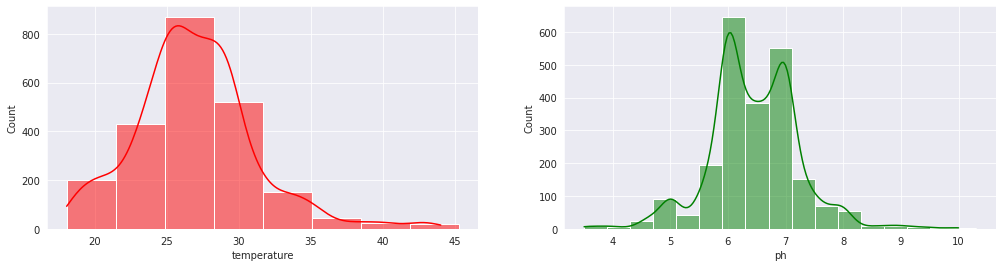

In [101]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.temperature ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.ph ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

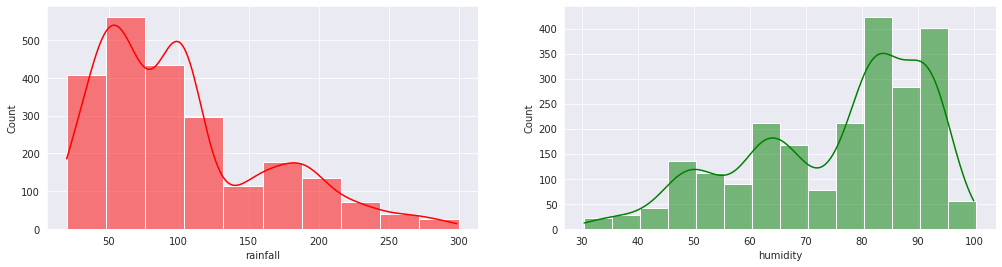

In [102]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.rainfall ,  binwidth=28 ,color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.humidity ,  binwidth=5 ,color="green" , kde={'alpha':0.5})

In [103]:
#Checking the Statistics for all the crops
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(crop['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(crop['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(crop['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(crop['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(crop['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(crop['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  56.31
Average Ratio of Phosphorous in the soil :  45.30
Average Ratio of Potassium in the soil :  33.34
Average temperature in Celsius :  26.95
Average Relative Humidity in % is :  75.47
Average pH value of the soil :  6.45
Average Rain fall in mm :  101.77


### 1- What crops need high temperatures or in general do not need low temperatures and what does this have to do with temperature and humidity?


1-The best suitable temperatures for the growth of the mango tree are when the temperature is 30 - 32 ° C, and it can withstand high temperatures between 44 - 48 ° C. and At temperatures of 18 degrees Celsius or less, they die just as mango trees are damaged

2-The best suitable temperatures for the growth of the Grapes tree are when the temperature is 14 - 25 ° C,

3-Orange trees grow best in a fully sunny area. The optimum temperature for orange trees ranges between 22-32 degrees Celsius

4- Temperature: A suitable banana climate is a mean temperature of 27oC. For the best temperature conditions for the banana shoot growth is between 26-28oC and for the fruit growth at 29-30oC. This is because when the temperature becomes 16oC to 10oC it will slow the plant growth and continuously it can kill the plan.

5- Whenever the temperature is more than 22, every time the humidity level increases, it is not a requirement to constantly increase, it can be lowered, but it will not drop below 50%

6.As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.


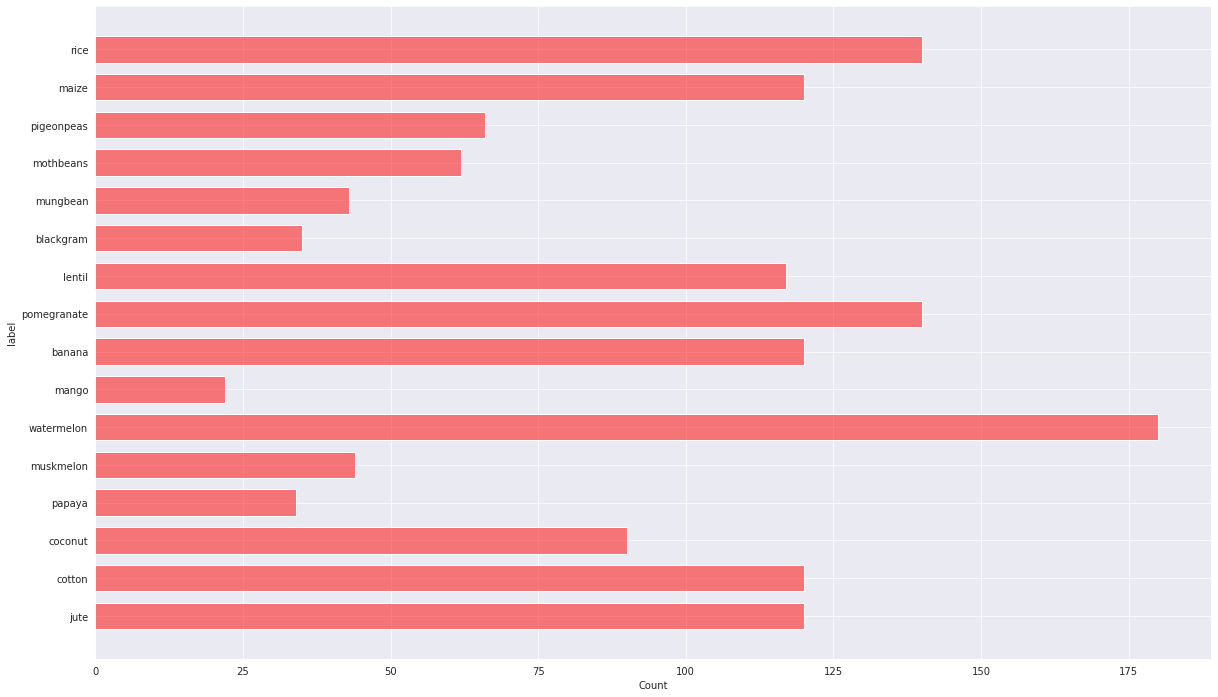

In [104]:
#The best suitable temperatures for the growth of the mango tree are when the temperature is 30 - 32 ° C
#and it can withstand high temperatures between 44 - 48 ° C. and 
# At temperatures of 18 degrees Celsius or less, they die just as mango trees are damaged

plt.figure(figsize=(20,12))
Crop_Median_Temperatures =crop.query("temperature > 15  & temperature <= 28 ") 
sns.histplot(y=Crop_Median_Temperatures.label, shrink=.7 ,color="red" , alpha=0.5 )

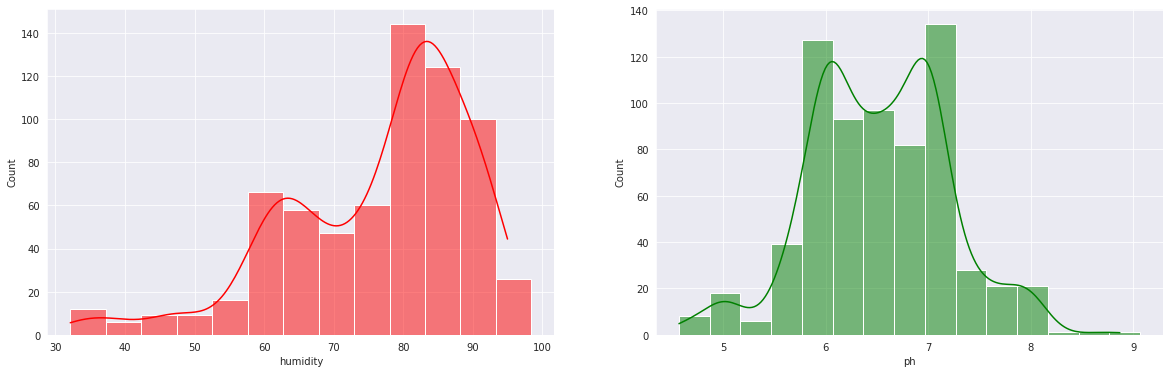

In [105]:
# Whenever the temperature is more than 20, every time the humidity level increases,
# it is not a requirement to constantly increase, it can be lowered, but it will not drop below 50%
#The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant

plt.figure(figsize=(20,6))
Crop_Temperatures =crop.query("temperature < 25 ") 
plt.subplot(1,2,1)
sns.histplot(Crop_Temperatures.humidity ,  binwidth=5.1 ,color="red" , kde={'alpha':0.5},)
plt.subplot(1,2,2)
sns.histplot(Crop_Temperatures.ph ,  binwidth=0.3 ,color="green" , kde={'alpha':0.5})
plt.show()

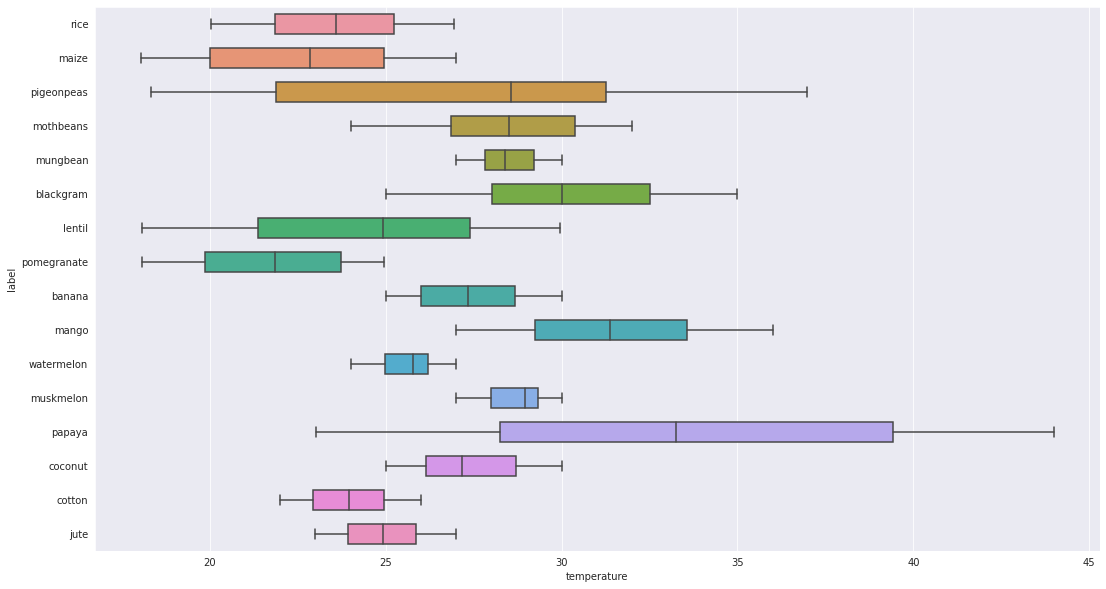

In [106]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=crop,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

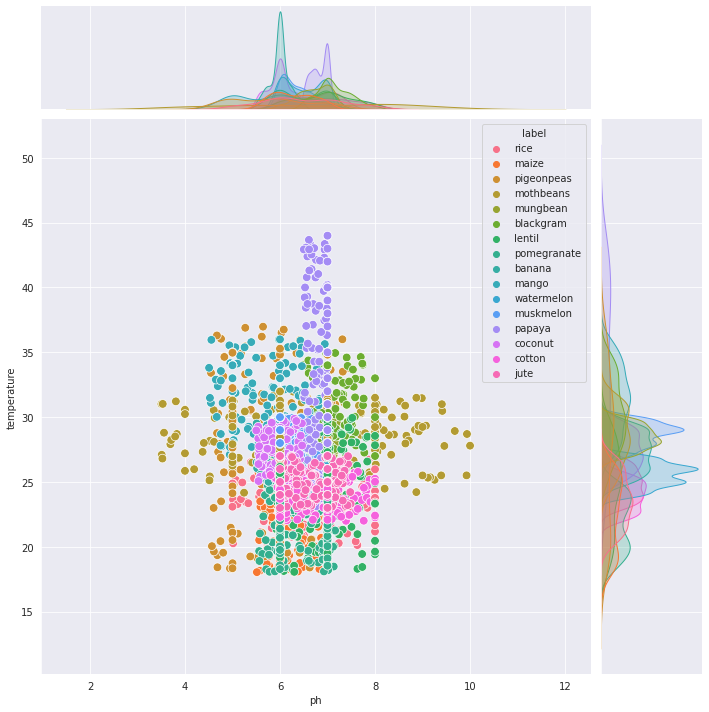

In [107]:
# In general, when the temperature rises above 21 pH decrease 
# The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
sns.jointplot(data=crop, x="ph", y="temperature" ,height=10 ,hue="label" , space=0.1 ,s=75 )
plt.show()

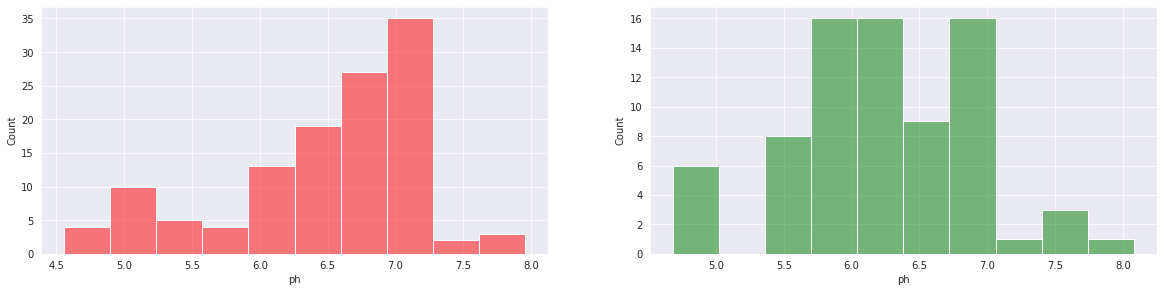

In [108]:
# pH decreases with increase in temperature.
Crop_high_Temperatures =crop.query("temperature > 34 ") 
Crop_low_Temperatures =crop.query("temperature < 19.5 ") 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(Crop_high_Temperatures.ph , binwidth=.34,color="red" ,alpha=0.5,)
plt.subplot(2,2,2)
sns.histplot(Crop_low_Temperatures.ph , binwidth=.34  ,color="green" ,alpha=0.5)
plt.show()

In [109]:
print( "Lowest pH value at low temperatures : " , Crop_low_Temperatures.ph.min())
print( "Lowest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.min())
print("- -- -- --- --- -- --- ")
print( "Highest pH value at low temperatures : " , Crop_low_Temperatures.ph.max())
print( "Highest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.max())
print("- -- -- --- --- -- --- ")
print( "Average pH value at low temperatures : " , Crop_low_Temperatures.ph.mean())
print( "Average pH value at Highest temperatures : " , Crop_high_Temperatures.ph.mean())

Lowest pH value at low temperatures :  4.681576043
Lowest pH value at Highest temperatures :  4.555688532
- -- -- --- --- -- --- 
Highest pH value at low temperatures :  8.0
Highest pH value at Highest temperatures :  7.741418772
- -- -- --- --- -- --- 
Average pH value at low temperatures :  6.252188914026316
Average pH value at Highest temperatures :  6.437170803606557


In [110]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season
print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] < 35)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'papaya']
-----------------------------------
Winter Crops
['pigeonpeas']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### 2-What is the required ratio of potassium content in the soil for some plants?
Crops which requires very Low Ratio of Potassium Content in Soil:
['orange']

Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']

Crops which requires median Ratio of Potassium Content in Soil: ['chickpea' 'banana' 'watermelon' 'muskmelon' 'papaya']


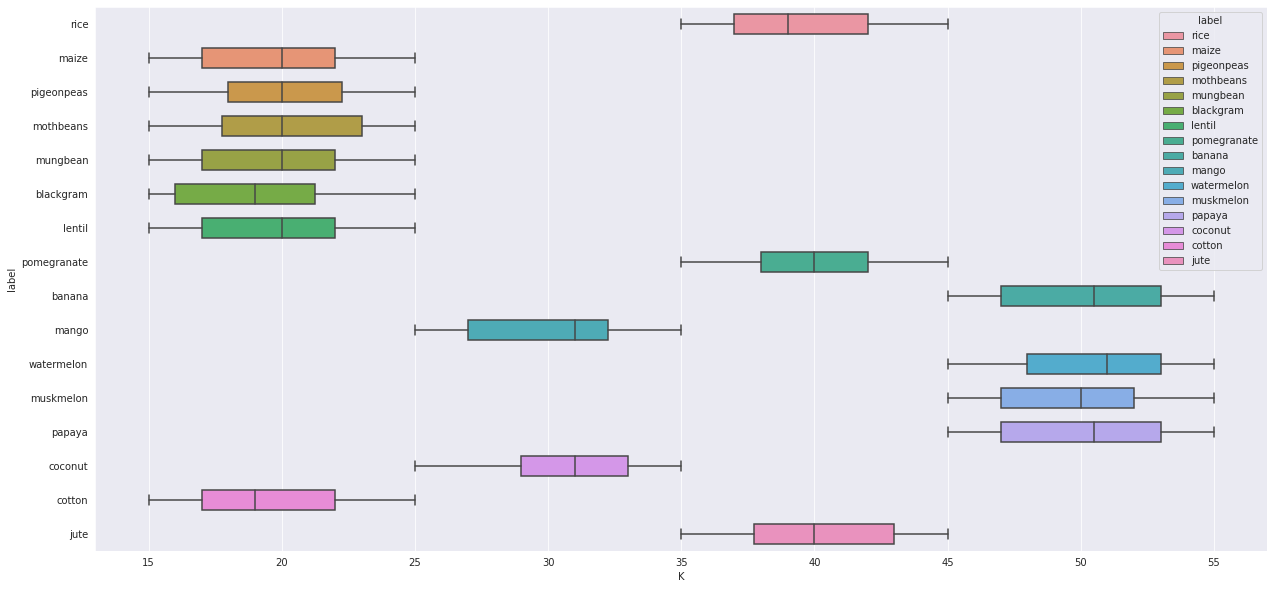

In [111]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(21,10))
sns.boxplot(x="K", y="label", data=crop,
            whis=[0, 100], width=0.6
            , orient="h" ,  hue="label" , dodge=False)
plt.show()

In [112]:
print("Crops which requires very Low Ratio of Potassium Content in Soil:", crop[crop['K']  < 15]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", crop[crop['K'] > 175]['label'].unique())
print("Crops which requires median Ratio of Potassium Content in Soil:", crop.query("K > 45 & K < 90")['label'].unique())

Crops which requires very Low Ratio of Potassium Content in Soil: []
Crops which requires very High Ratio of Potassium Content in Soil: []
Crops which requires median Ratio of Potassium Content in Soil: ['banana' 'watermelon' 'muskmelon' 'papaya']


### 3- What is the required ratio of phosphorus and Nitrogen content in the soil for some plants?
Crops which requires very Low Ratio of Nitrogen Content in Soil: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate''mango' 'grapes' 'apple' 'orange' 'coconut']

Crops which requires very High Ratio of Nitrogen Content in Soil: ['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']

Crops which requires median Ratio of Nitrogen Content in Soil: ['rice' 'maize' 'chickpea' 'blackgram' 'papaya' 'jute']

Crops which requires very Low Ratio of Phosphorus Content in Soil: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']

Crops which requires very High Ratio of Phosphorus Content in Soil: ['grapes' 'apple']

Crops which requires median Ratio of Phosphorus Content in Soil: ['chickpea' 'kidneybeans' 'pigeonpeas' 'blackgram' 'lentil' 'banana']

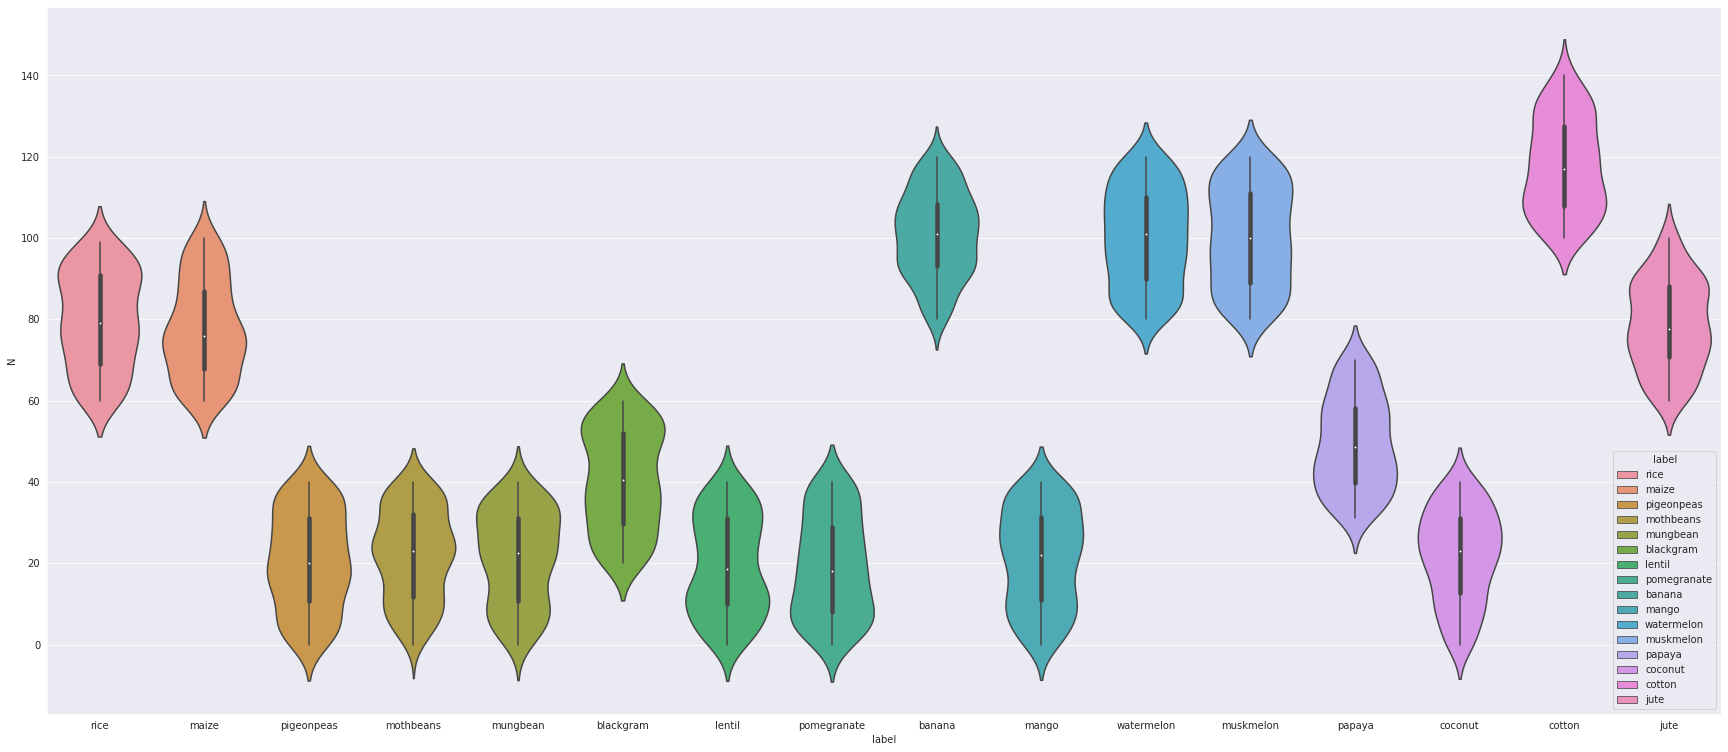

In [113]:
plt.figure(figsize=(30,13))
sns.violinplot(x="label", y="N", data=crop, hue="label" ,dodge=False)
plt.show()

In [114]:
print("Crops which requires very Low Ratio of Nitrogen Content in Soil:", crop[crop['N']  < 10]['label'].unique())
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", crop[crop['N'] > 110]['label'].unique())
print("Crops which requires median Ratio of Nitrogen Content in Soil:", crop.query("N > 40 & N < 80")['label'].unique())

Crops which requires very Low Ratio of Nitrogen Content in Soil: ['pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate' 'mango'
 'coconut']
Crops which requires very High Ratio of Nitrogen Content in Soil: ['banana' 'watermelon' 'muskmelon' 'cotton']
Crops which requires median Ratio of Nitrogen Content in Soil: ['rice' 'maize' 'blackgram' 'papaya' 'jute']


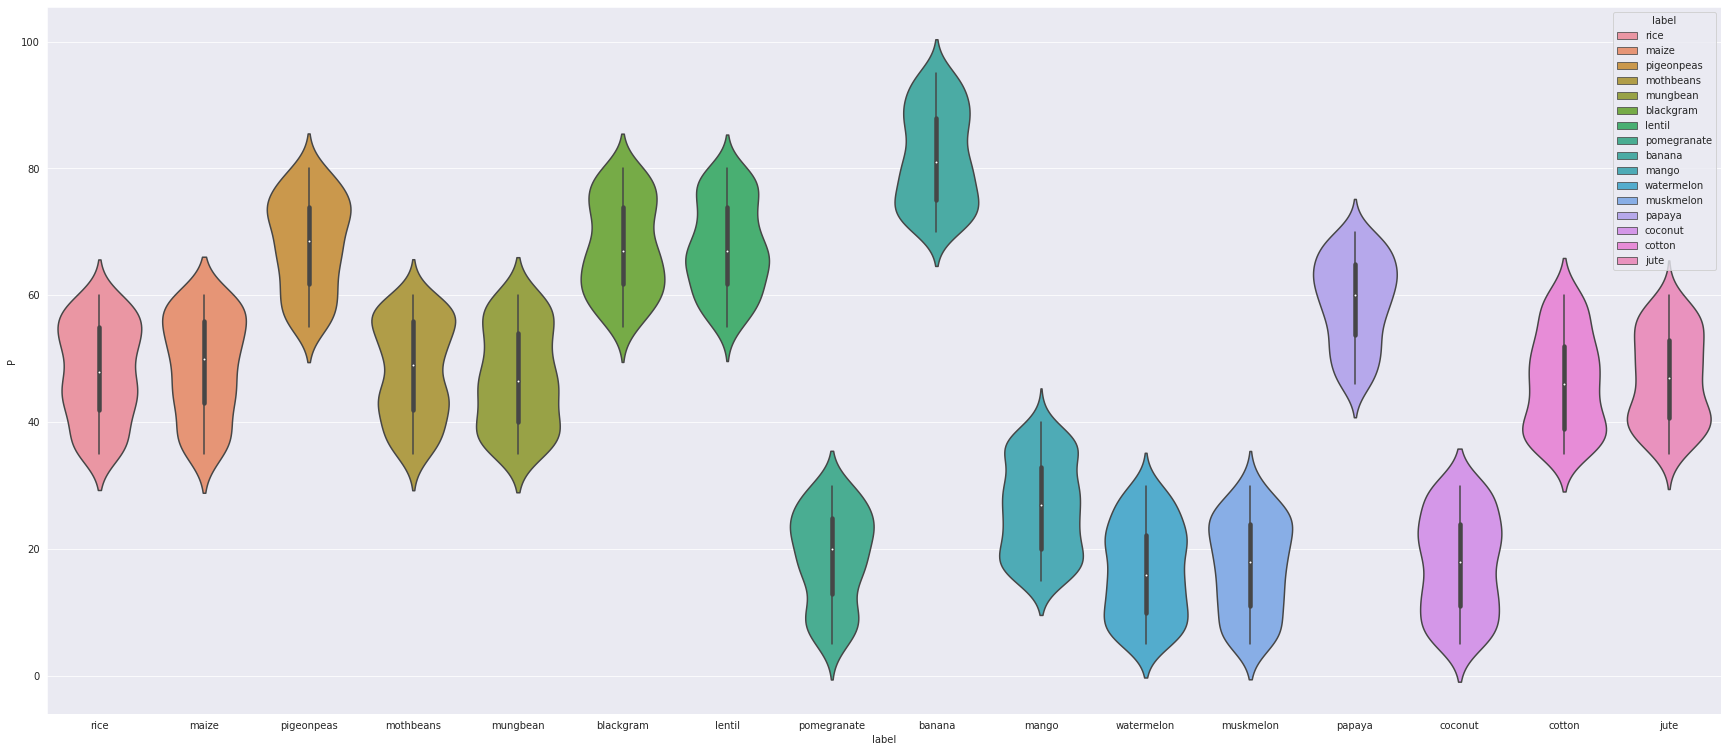

In [115]:
plt.figure(figsize=(30,13))
sns.violinplot(x="label", y="P", data=crop, hue="label" ,dodge=False)
plt.show()

In [116]:
print("Crops which requires very Low Ratio of Phosphorus Content in Soil:", crop[crop['P']  < 10]['label'].unique())
print("Crops which requires very High Ratio of Phosphorus Content in Soil:", crop[crop['P'] > 110]['label'].unique())
print("Crops which requires median Ratio of Phosphorus Content in Soil:", crop.query("P > 70 & P < 110")['label'].unique())

Crops which requires very Low Ratio of Phosphorus Content in Soil: ['pomegranate' 'watermelon' 'muskmelon' 'coconut']
Crops which requires very High Ratio of Phosphorus Content in Soil: []
Crops which requires median Ratio of Phosphorus Content in Soil: ['pigeonpeas' 'blackgram' 'lentil' 'banana']


In [117]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def compare(conditions = ['N','P','K']):
    print()
    print("1- {con} level in soil relative to Rice : ".format(con = conditions))
    print("The Rice plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].mean())
    print("The Rice plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].min())
    print("The Rice plant has the High potassium content in the soil = ", crop[crop['label'] == "rice"][conditions].max())
    print()
    print("2- {con} level in soil relative to Cotton : ".format(con = conditions))
    print("The Cotton plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].mean())
    print("The Cotton plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].min())
    print("The Cotton plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].max())
    print()
    print("3- {con} level in soil relative to Mango : ".format(con = conditions))
    print("The Mango plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "mango"][conditions].mean())
    print("The Mango plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "mango"][conditions].min())
    print("The Mango plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "mango"][conditions].max())
    print()
    print("4- {con} level in soil relative to Apple : ".format(con = conditions))
    print("The Apple plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "apple"][conditions].mean())
    print("The Apple plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "apple"][conditions].min())
    print("The Apple plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "apple"][conditions].max())
    print()
    print("5- {con} level in soil relative to Maize : ".format(con = conditions))
    print("The Maize plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].mean())
    print("The Maize plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].min())
    print("The Maize plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].max())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K'), value='N'), Output()), _dom_…

### 4- Does cold weather increase the possibility of low phosphorus levels in the soil?

1- There is a lack of clarity in this question, and it is considered that there is no clear answer, but when adding the level of humidity in this question, the topic remains clearer than the first, but there is ambiguity so far. Generally not the best explanation for a question

2- But in general, the temperature has effects and cold weather increases the likelihood of phosphorous deficiency. In the soil, we found that the levels of phosphorous are confined between 55 to 80, while the normal weather value was between 20 to 120

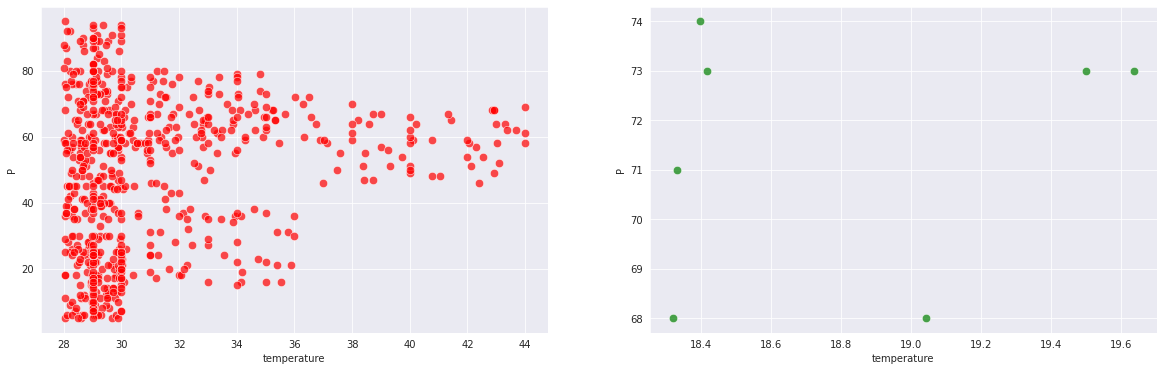

In [118]:
high_weather = crop.query("temperature > 28 & humidity > 50 ")
cold_weather = crop.query("temperature < 20  & humidity < 40")
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=high_weather, x="temperature", y="P"  ,s=70 , color='red' , alpha =0.7)
plt.subplot(1,2,2)
sns.scatterplot(data=cold_weather, x="temperature", y="P" ,s=70 , color="green" , alpha =0.7 )
plt.show()

### 5-Does rainfall affect the soil?
1- In general, when precipitation increases, it increases with the degree of humidity

2- Changes in precipitation affect vegetation which has impacts on soil organic matter cycle and the texture of soil. This can influence the runoff rate and formation of surface crusts, which affect erosion and cause deterioration


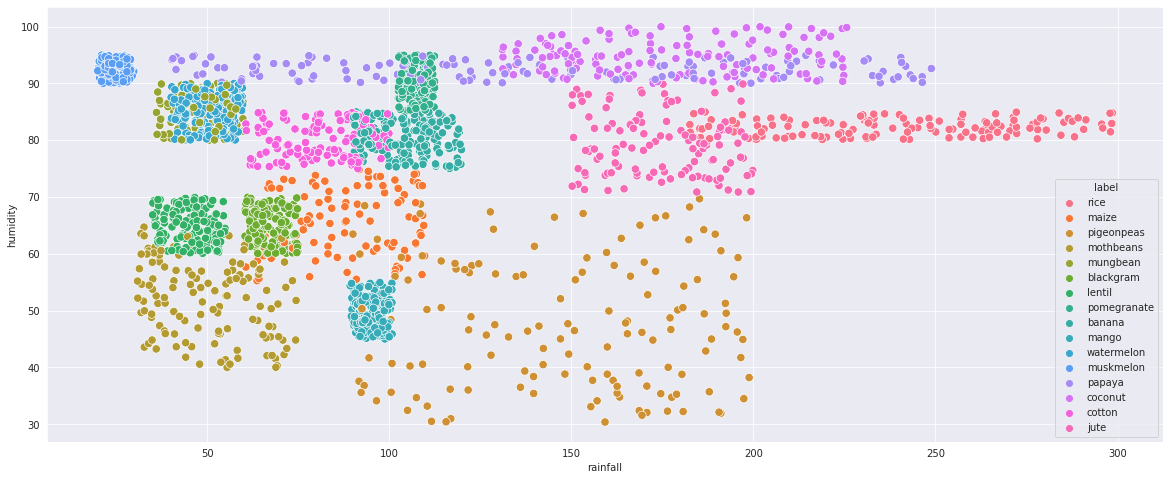

In [119]:
# In general, when precipitation increases, it increases with the degree of humidity
plt.figure(figsize=(20,8))
sns.scatterplot(data=crop, x="rainfall", y="humidity" , hue="label" ,s=70)
plt.show()

In [120]:
high_rainfall = crop.query("rainfall > 100")
low_rainfall = crop.query("rainfall < 80")
print( "Lowest humidtiy value at low rainfall : " , low_rainfall.humidity.min())
print( "Lowest humidtiy value at Highest rainfall : " , high_rainfall.humidity.min())
print("- -- -- --- --- -- --- ")
print( "Highest humidtiy value at low rainfall : " , low_rainfall.humidity.max())
print( "Highest humidtiy value at Highest rainfall : " , high_rainfall.humidity.max())
print("- -- -- --- --- -- --- ")
print( "Average humidtiy value at low rainfall : " , low_rainfall.humidity.mean())
print( "Average humidtiy value at Highest rainfall : " , high_rainfall.humidity.mean())


Lowest humidtiy value at low rainfall :  40.00933429
Lowest humidtiy value at Highest rainfall :  30.40046769
- -- -- --- --- -- --- 
Highest humidtiy value at low rainfall :  94.96218673
Highest humidtiy value at Highest rainfall :  99.98187601
- -- -- --- --- -- --- 
Average humidtiy value at low rainfall :  74.97678815133266
Average humidtiy value at Highest rainfall :  80.04412389788047


## Correlation between different features

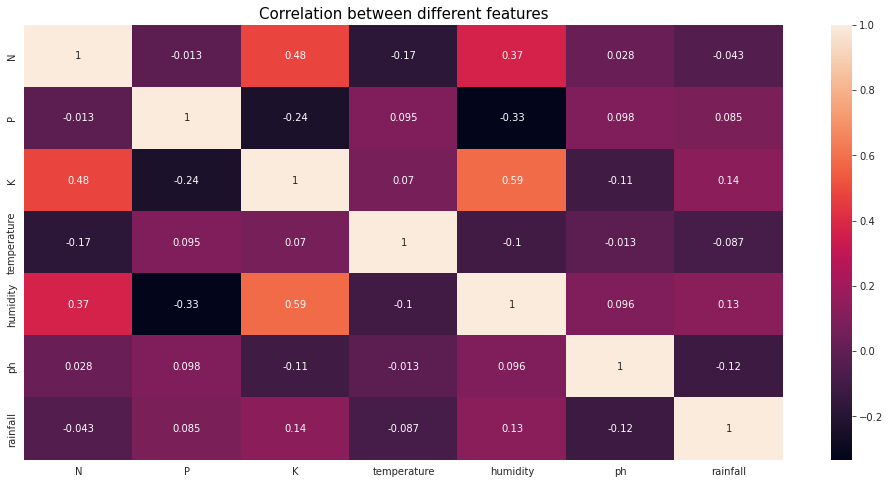

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(crop.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [122]:
x = crop.drop(['label'], axis = 1)
y = crop['label']

print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)

The Shape of x: (2260, 7)
The Shape of y: (2260,)
